In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

iris =datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm', LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [5]:
from sklearn.datasets import make_moons

moons = make_moons()

X, y = moons[0], moons[1]

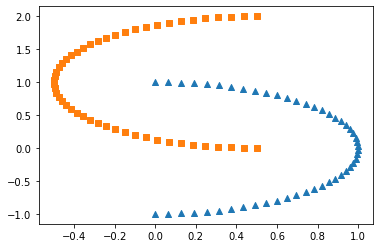

In [6]:
plt.scatter(X[np.where(y==0), 1], X[np.where(y==0), 0], marker = "^")
plt.scatter(X[np.where(y==1), 1], X[np.where(y==1), 0], marker = "s")

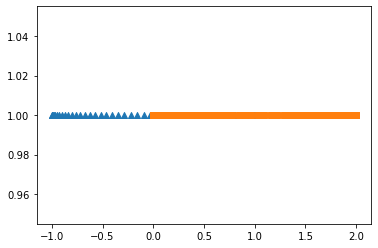

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

plt.scatter(X_poly[np.where(y==0), 1], X_poly[np.where(y==0), 0], marker = "^")
plt.scatter(X_poly[np.where(y==1), 1], X_poly[np.where(y==1), 0], marker = "s")

In [8]:
polynomial_svm_clf = Pipeline([
                            ("poly_features", PolynomialFeatures(degree=3)),
                            ("scaler", StandardScaler()),
                            ("svm_clf", LinearSVC(C=10, loss="hinge"))
                     ])

polynomial_svm_clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [28]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

<ipython-input-33-28dd6d65c087>:15: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,


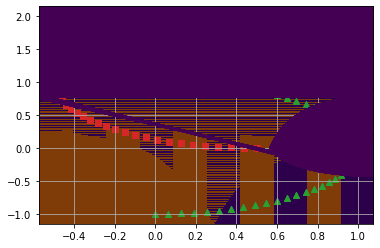

In [33]:
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),0],marker="^")
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),0],marker="s")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(0,xlim,1000),
                    np.linspace(0,ylim,1000))

Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.grid()
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),0],marker="^")
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),0],marker="s")


In [ ]:
from sklearn.svm import NuSVC

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=100, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()